In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 7)
%matplotlib inline

## ヒートマップ
---
二次元グラフ上で、値を色で表したもの。  
二次元グラフの軸はクロス集計表のような質的変数でも、座標 (地図など) のような量的変数でもよい。  
色で表す値は主に量的変数 (色の濃淡で表現) が用いられるが、質的変数 (色の違いで表現) でもよい。

In [2]:
titanic = sns.load_dataset('titanic')
print('titanic')
display(titanic)

titanic


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [3]:
table = pd.pivot_table(
    titanic,
    values='fare',
    index='class',
    columns='embark_town',
    aggfunc='median')
print('乗船地・等級ごとの料金の中央値')
display(table)

乗船地・等級ごとの料金の中央値


embark_town  Cherbourg  Queenstown  Southampton
class                                          
First          78.2667       90.00        52.00
Second         24.0000       12.35        13.50
Third           7.8958        7.75         8.05

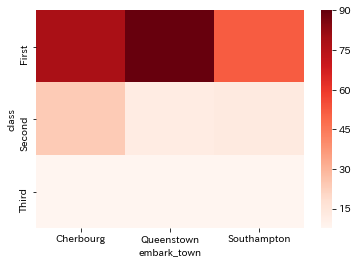

In [4]:
sns.heatmap(table, cmap='Reds')
plt.show()

### Pythonでのヒートマップ表示
---
`seaborn.heatmap`を使用する。 (二次元グラフが地図などの場合は散布図などを使用する)  
カラーマップは色の濃淡などが値の大小を表すようなものを指定する。

In [5]:
sns.heatmap??

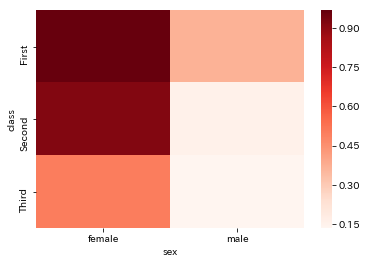

In [6]:
sns.heatmap(
    pd.pivot_table(titanic, values='survived', index='class', columns='sex'),
    cmap='Reds')
plt.show()

###### 練習問題

`titanic`データセットで、縦軸に`class`・横軸に`sex`をとったクロス集計表をヒートマップで表示する。

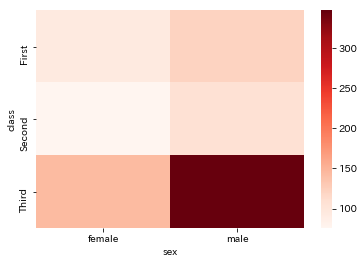

In [7]:
sns.heatmap(pd.crosstab(titanic['class'], titanic['sex']), cmap='Reds')
plt.show()

使用する場面は限られているが、表中の値を縦軸・横軸のカテゴリで階層的クラスタリングを実施した結果と併せて表示するなどの方法もある。

In [8]:
tips = sns.load_dataset('tips').query('1 < size < 5')
print('tips')
display(tips)

tips


total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[231 rows x 7 columns]

In [9]:
table = pd.pivot_table(tips, values='total_bill', index='day', columns='size')
display(table)

size          2          3          4
day                                  
Thur  15.156875  19.160000  29.950000
Fri   16.321875  15.980000  40.170000
Sat   16.837170  25.509444  29.876154
Sun   17.560000  22.184000  26.688333

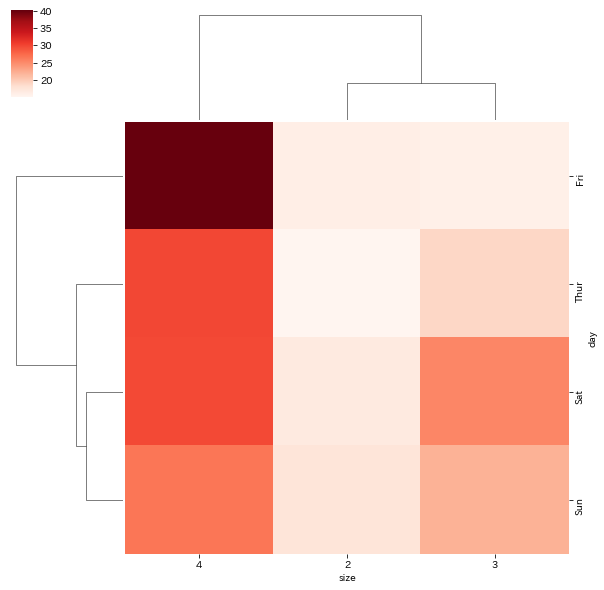

In [10]:
sns.clustermap(table, cmap='Reds')
plt.show()

## 散布図行列
---
3 つ以上の変数があるデータセットで、 2 つの変数の組み合わせ全てに対して散布図を作成したもの。対角 (同じ変数同士) にはヒストグラムを配置したりする。

In [11]:
iris = sns.load_dataset('iris')
print('iris')
display(iris)

iris


sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
..            ...          ...           ...          ...        ...
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

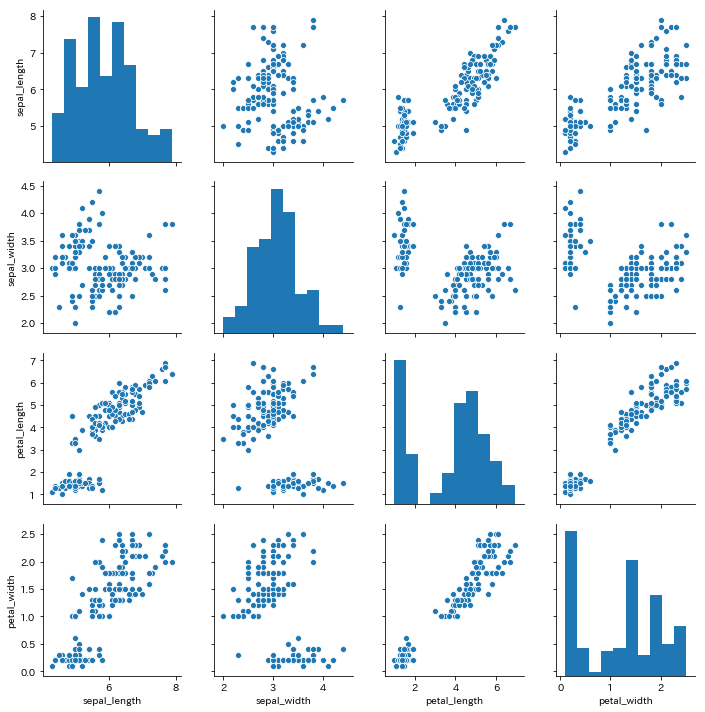

In [12]:
sns.pairplot(iris)
plt.show()

### Pythonでの散布図行列表示
---
`pandas.plotting.scatter_matrix`や`seaborn.pairplot`を用いる。

In [13]:
tips = sns.load_dataset('tips')
print('tips')
display(tips)

tips


total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [14]:
pd.plotting.scatter_matrix??

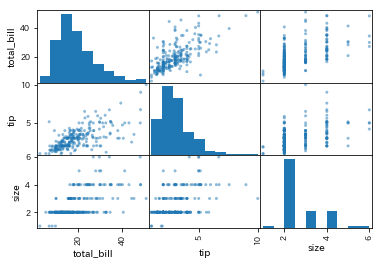

In [15]:
pd.plotting.scatter_matrix(tips)
plt.show()

In [16]:
sns.pairplot??

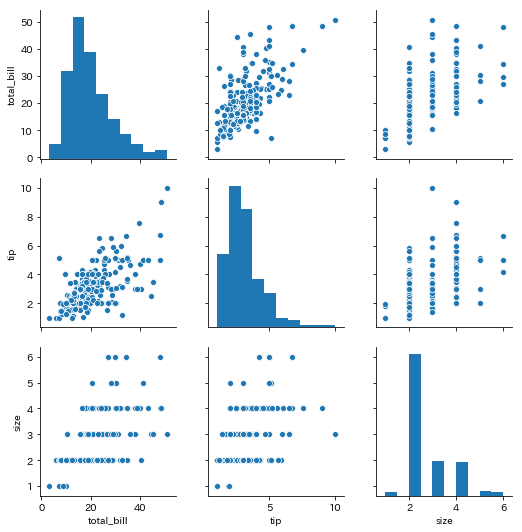

In [17]:
sns.pairplot(tips)
plt.show()

###### 練習問題

`crashes`データセットの散布図行列を表示する。

In [18]:
crashes = sns.load_dataset('car_crashes')
print('crashes')
display(crashes)

crashes


total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
..    ...       ...      ...             ...          ...          ...   
48   23.8     8.092    6.664          23.086       20.706       992.61   
49   13.8     4.968    4.554           5.382       11.592       670.31   
50   17.4     7.308    5.568          14.094       15.660       791.14   

    ins_losses abbrev  
0       145.08     AL  
1       133.93     AK  
2       110.35     AZ  
..         ...    ...  
48      152.56     WV  
49      106.62     WI  
50      122.04     WY  

[51 rows x 8 columns]

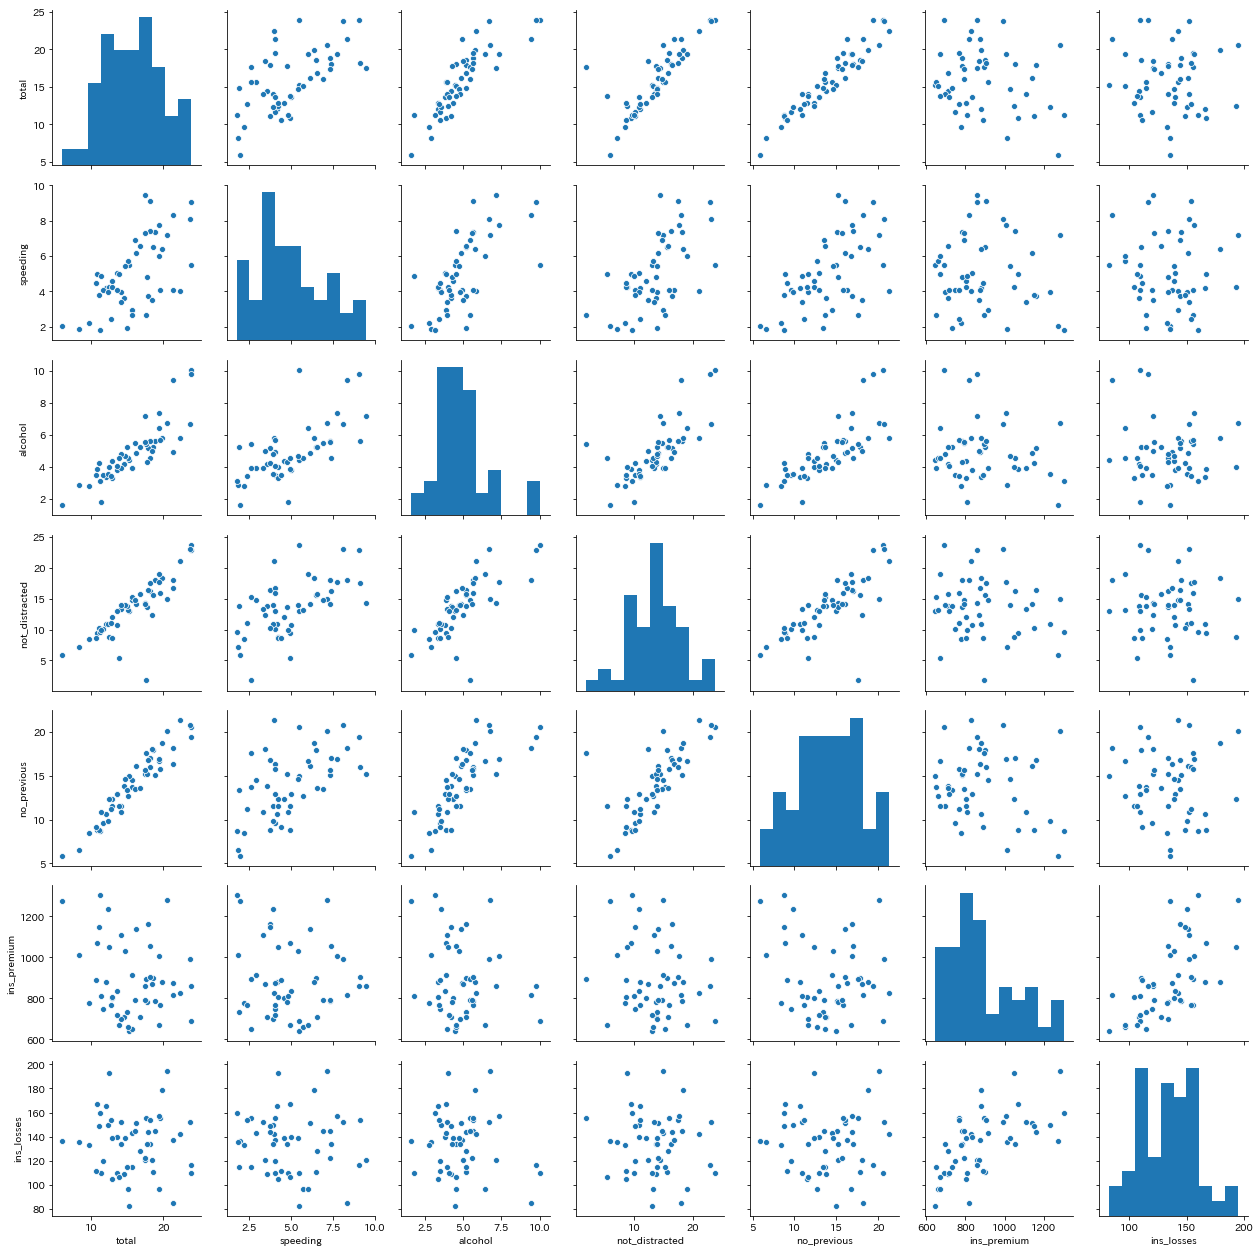

In [19]:
sns.pairplot(crashes)
plt.show()

## 相関行列
---
散布図行列のように 2 つの変数の組み合わせ全てに対して相関係数を集計したもの。  
変数が多く全ての変数の散布図行列を表示しにくい場合に、代わりに利用することもある。ただし、相関係数では捉えられない関係もあるので、必ず最後は散布図も確認する。

In [20]:
iris.corr()

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

### Pythonでの相関行列作成
---
`pandas.DataFrame.corr`を利用する。

In [21]:
pd.DataFrame.corr??

In [22]:
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

###### 練習問題

`crashes`データセットの相関行列を作成する。

In [23]:
crashes.corr()

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

## 様々な可視化手法の組み合わせ

### 相関行列とヒートマップ
---
色によって相関係数を把握しやすくなるので、相関行列をヒートマップにすることがよくある。  
デフォルトの設定でヒートマップを作成すると、相関行列の最小値・最大値を色の下限・上限に使用してしまい、中心が 0 にならなかったり、全体に相関関係が低いのに高いものがあるように感じたり、誤解が生じやすい。また、色もデフォルトだと相関関係を把握しにくい。必ず**`vmin`, `vmax`は -1, 1** に設定し、**`cmap`も中央が薄く、最小や最大に近づくほど色が濃い**ものを使用する。

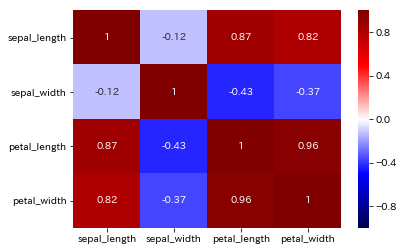

In [24]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)
plt.show()

###### 練習問題

`tips`データセットの相関行列をヒートマップで表示する。

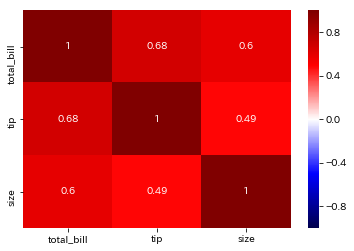

In [25]:
sns.heatmap(tips.corr(), vmin=-1, vmax=1, cmap='seismic', annot=True)
plt.show()

### 散布図行列と相関行列
---
散布図行列も相関行列も右上三角部分と左下三角部分は全く同じ情報を表しており、情報としては無駄になる。そこで、半分を散布図行列に、残り半分を相関行列にすると無駄がない。

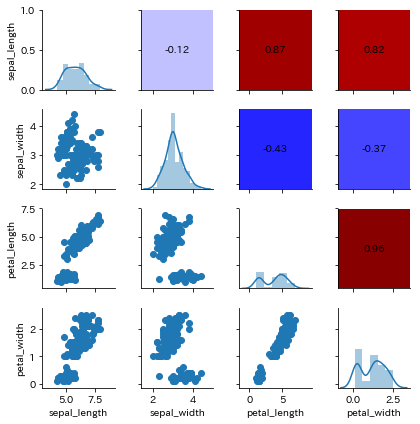

In [26]:
def corr_scatter_matrix(data, height=1.5, cmap='seismic', **kwargs):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize
    from matplotlib.cm import ScalarMappable
    import seaborn as sns

    def corr(x, y, label, color, **kwargs):
        corr_ = np.corrcoef(x, y)[0, 1]
        norm = Normalize(vmin=kwargs.pop('vmin') if 'vmin' in kwargs else -1,
                         vmax=kwargs.pop('vmax') if 'vmax' in kwargs else 1)
        cmap = plt.get_cmap(kwargs.pop('cmap') if 'cmap' in kwargs else None)
        sm = ScalarMappable(norm, cmap)
        ax = plt.gca()
        ax.text(0.5, 0.5, '{:.2f}'.format(corr_), transform=ax.transAxes,
                horizontalalignment='center', verticalalignment='center',
                **kwargs)
        ax.set(facecolor=sm.to_rgba(corr_))

    matrix = sns.PairGrid(data, height=height)
    matrix.map_upper(corr, cmap=cmap, **kwargs)
    matrix.map_lower(plt.scatter)
    matrix.map_diag(sns.distplot)
    plt.show()

corr_scatter_matrix(iris)

### 散布図行列とカテゴリ変数
---
カテゴリ変数は同じ値が多いため、単純に散布図などを描くと特徴を掴みにくい。

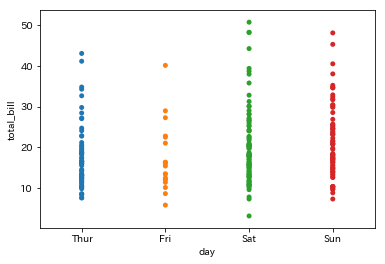

In [27]:
sns.stripplot('day', 'total_bill', data=tips, jitter=False)
plt.show()

そこで、以下のようなグラフを用いる。

#### ストリッププロット
---
値に小さな乱数を加えて少しずつずらすことで、値の重なり具合をわかりやすくしたもの。  
`seaborn.stripplot`を使用する。

In [28]:
sns.stripplot??

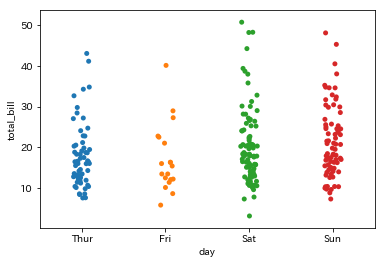

In [29]:
sns.stripplot('day', 'total_bill', data=tips)
plt.show()

#### バイオリンプロット
---
値の重なり具合をデータの分布として表したもの。  
`seaborn.violinplot`を使用する。

In [30]:
sns.violinplot??

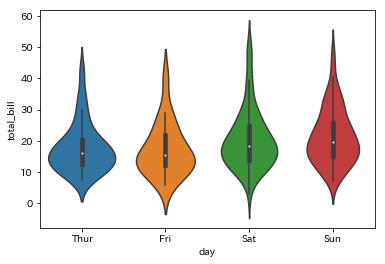

In [31]:
sns.violinplot('day', 'total_bill', data=tips)
plt.show()

### 全変数の可視化
---
上の散布図行列と相関行列を組み合わせた図をカテゴリ変数にも対応させた、以下のような関数を用意しておくとよい。

In [32]:
def pairplot(df, **kwargs):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.figure import figaspect
    import seaborn as sns

    def corrplot(x, y, data, cmap='coolwarm', correlation='spearman',
                 **kwargs):
        from scipy import stats
        from matplotlib.patches import Ellipse

        data_x = data[x]
        data_y = data[y]
        is_x_category = data_x.dtype.name == 'category'
        is_y_category = data_y.dtype.name == 'category'
        if is_x_category:
            data_x = data_x.cat.codes
        if is_y_category:
            data_y = data_y.cat.codes
        if correlation is 'pearson' or not is_x_category or not is_y_category:
            method = 'pearson'
        else:
            method = 'spearman'
        r = data_x.corr(data_y, method=method)
        if type(cmap) is str:
            cmap = plt.get_cmap(cmap)
        color = cmap((r + 1) / 2)
        ax.axis('off')
        ax.add_artist(
            Ellipse((0.5, 0.5),
                    width=np.sqrt(1 + r),
                    height=np.sqrt(1 - r),
                    angle=45,
                    color=color))
        ax.text(
            0.5,
            0.5,
            '{:.2f}'.format(r),
            size='x-large',
            horizontalalignment='center',
            verticalalignment='center')

    def crosstabplot(x, y, data, ax, **kwargs):
        import pandas as pd

        cross = pd.crosstab(data[x], data[y]).values
        size = cross / cross.max() * 500
        crosstab_kws = kwargs[
            'crosstab_kws'] if 'crosstab_kws' in kwargs else {}
        scatter_kws = dict(color=sns.color_palette()[0], alpha=0.3)
        scatter_kws.update(crosstab_kws['scatter_kws'] if 'scatter_kws' in
                           crosstab_kws else {})
        text_kws = dict(size='x-large')
        text_kws.update(crosstab_kws['text_kws'] if 'text_kws' in
                        crosstab_kws else {})
        for (xx, yy), count in np.ndenumerate(cross):
            ax.scatter(xx, yy, s=size[xx, yy], **scatter_kws)
            ax.text(
                xx,
                yy,
                count,
                horizontalalignment='center',
                verticalalignment='center',
                **text_kws)

    def show_off_legend(ax):
        legend = ax.get_legend()
        if legend:
            legend.set(visible=False)

    n_variables = df.columns.size
    hue = kwargs['hue'] if 'hue' in kwargs else None
    figsize = kwargs['figsize'] if 'figsize' in kwargs else figaspect(
        1) * 0.5 * n_variables
    _, axes = plt.subplots(n_variables, n_variables, figsize=figsize)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(n_variables):
        axes[i, i].get_shared_x_axes().join(*axes[i:n_variables, i])
        if i > 1:
            axes[i, 0].get_shared_y_axes().join(*axes[i, :i - 1])

    for (row, col), ax in np.ndenumerate(axes):
        x = df.columns[col]
        y = df.columns[row]
        x_data = df[x]
        y_data = df[y]
        x_dtype = x_data.dtype.name
        y_dtype = y_data.dtype.name
        is_x_category = x_dtype == 'category'
        is_y_category = y_dtype == 'category'
        if is_x_category:
            x_categories = x_data.cat.categories
        if is_y_category:
            y_categories = y_data.cat.categories

        if row == col:  # diagonal
            hue_data = df[hue] if hue else None
            if is_x_category:
                bar_kws = dict(alpha=0.4, orientation='vertical')
                bar_kws.update(kwargs['bar_kws'] if 'bar_kws' in
                               kwargs else {})
                if hue:
                    cross = pd.crosstab(x_data, hue_data)
                    cross.index = cross.index.categories
                    if hue_data.dtype.name == 'category':
                        cross.columns = cross.columns.categories
                    else:
                        cross.columns = hue_data.unique()
                    cross.reset_index(inplace=True)
                    melt = pd.melt(cross, id_vars='index', var_name='hue')
                    hue_values = melt['hue'].unique()
                    colors = sns.color_palette(n_colors=hue_values.size)
                    for i in range(hue_values.size):
                        hue_value = hue_values[i]
                        color = colors[i]
                        subset = melt[melt['hue'] == hue_value]
                        if i is 0:
                            bottom = 0
                        else:
                            bottom = melt.loc[melt['hue'].isin(
                                hue_values[:i])].groupby('index').sum().loc[
                                    subset['index']].values.ravel()
                        ax.bar(
                            subset['index'],
                            subset['value'],
                            bottom=bottom,
                            color=color,
                            **bar_kws)
                else:
                    cross = pd.crosstab(x_data, []).values.ravel()
                    sns.barplot(
                        x_data.cat.categories,
                        cross,
                        color=sns.color_palette()[0],
                        ci=None,
                        ax=ax,
                        **bar_kws)
            else:
                dist_kws = kwargs['dist_kws'] if 'dist_kws' in kwargs else {}
                if hue:
                    colors = sns.color_palette(n_colors=hue_data.unique().size)
                    hist_kws = dict(color=colors, alpha=0.4)
                    hist_kws.update(dist_kws['hist_kws'] if 'hist_kws' in
                                    dist_kws else {})
                    if hue_data.dtype.name == 'category':
                        hue_values = df[hue].cat.categories
                    else:
                        hue_values = df[hue].unique()
                    ax.hist([df.loc[df[hue] == v, x] for v in hue_values],
                            density=True,
                            histtype='barstacked',
                            **hist_kws)
                    for c, v in zip(colors, hue_values):
                        sns.distplot(
                            df.loc[df[hue] == v, x],
                            hist=False,
                            color=c,
                            ax=ax,
                            **dist_kws)
                else:
                    sns.distplot(x_data, ax=ax, **dist_kws)
        elif row < col:  # upper
            corr_kws = kwargs['corr_kws'] if 'corr_kws' in kwargs else {}
            corrplot(x, y, data=df, **corr_kws)
        else:  # lower
            if is_x_category and is_y_category:
                crosstabplot(x, y, data=df, ax=ax)
            else:
                violin_kws = kwargs[
                    'violin_kws'] if 'violin_kws' in kwargs else {}
                if is_x_category or is_y_category:
                    orient = 'v' if is_x_category else 'h'
                    sns.violinplot(
                        x, y, hue, df, orient=orient, ax=ax, **violin_kws)
                    show_off_legend(ax)
                else:
                    scatter_kws = kwargs[
                        'scatter_kws'] if 'scatter_kws' in kwargs else {}
                    sns.scatterplot(x, y, hue, data=df, ax=ax, **scatter_kws)
                    show_off_legend(ax)

        if row < n_variables - 1:
            ax.set(xlabel='')
            for ticklabel in ax.get_xticklabels():
                ticklabel.set(visible=False)
        else:
            ax.set(xlabel=x)
            if is_x_category:
                ax.set(
                    xticks=np.arange(x_categories.size),
                    xticklabels=x_data.cat.categories)
        if col > 0:
            ax.set(ylabel='')
            for ticklabel in ax.get_yticklabels():
                ticklabel.set(visible=False)
        else:
            ax.set(ylabel=y)
            if row > 0 and is_y_category:
                ax.set(
                    yticks=np.arange(y_categories.size),
                    yticklabels=y_data.cat.categories)
    return axes

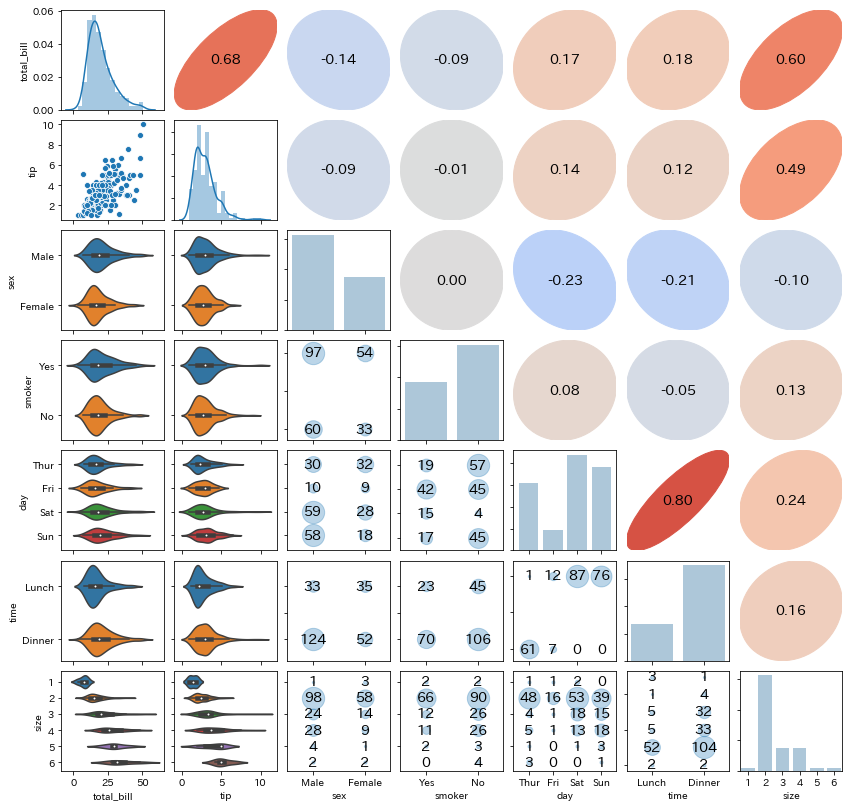

In [33]:
tips.loc[:, 'sex':'size'] = tips.loc[:, 'sex':'size'].astype('category')
pairplot(tips)
plt.show()

## 平行座標プロット
---
横軸に各変数・縦軸に値をとり、同じサンプルの値を線で結んだグラフ。  
他と傾向の違う変数を見つけたり、特定の条件のサンプル群の傾向を見つけたりするのに役立つ。

In [34]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()

iris['species'] = pd.Categorical(iris['species'], ordered=True).codes
fig = go.Figure(data=[
    go.Parcoords(dimensions=[
        dict(
            range=[iris[col].min(), iris[col].max()],
            label=col,
            values=iris[col]) for col in iris.columns
    ])
])

iplot(fig)